# How to find eclipsing binaries and transits and (optionally) mask them.

Warning: this code is not yet stable.

You may want to mask transits if you're trying to measure a star's rotation period. The transits can interfere with the rotation period measurement. Not shown in this tutorial is a smoothing step. To find transits using BLS, it's best if the stellar variability is removed first. People often use a median filter for this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import starspot as ss

Simulate some Basic data.

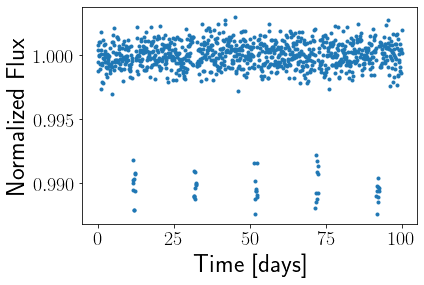

In [2]:
N = 1000
x = np.linspace(0, 100, N)
err = 1e-3
y = np.random.randn(N)*err + 1
yerr = np.ones_like(y)*err

t0, dur_hours, porb = 12, 24, 20
dur_days = dur_hours/24.

# Create 'eclipses' or 'transits'
mask = ((x - (t0 - .5*dur_days)) % porb) < dur_days
y[mask] -= 1e-2

plt.plot(x, y, ".");
plt.xlabel("Time [days]")
plt.ylabel("Normalized Flux");

Plot the folded light curve.

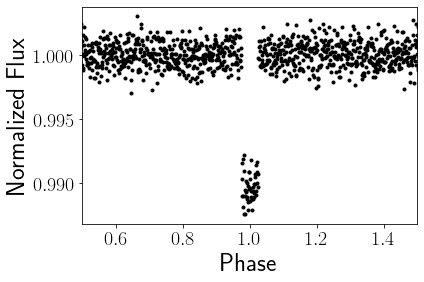

In [3]:
true_phase = ss.calc_phase(porb, x-t0)
plt.plot(true_phase, y, "k.")
plt.plot(true_phase+1, y, "k.")
plt.xlim(.5, 1.5);
plt.xlabel("Phase")
plt.ylabel("Normalized Flux");

Now find the period and epoch of the transits. This is just a wrapper to the astropy.timeseries BLS algorithm.

In [4]:
period_grid = np.linspace(2, 20, 100)  # The array of periods to search over for BLS.
duration_grid = np.linspace(.5, 1.5, 10)  # The array of durations (in days) to search over for BLS.
                                          # (The longest duration must be shorter than the shortest period)

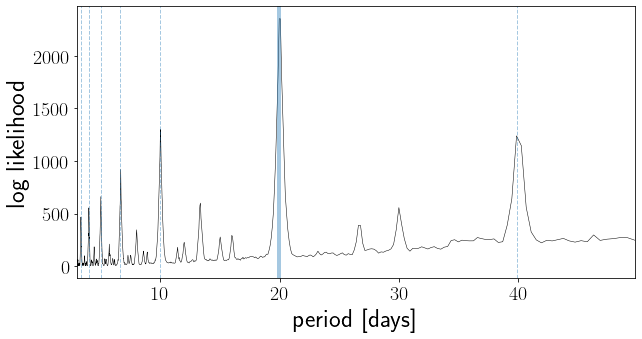

In [5]:
transit_masks, t0s, durs, porbs = ss.find_and_mask_transits(x, y, yerr,  # The light curve
                                                            period_grid, duration_grid,  # The period & duration grids for BLS
                                                            nplanets=1,  # The number of companions to look for.
                                                            plot=True)  # Option to plot the BLS periodogram.

Compare the results to the true values.

In [6]:
print(t0, dur_days, porb)
print(t0s[0], durs[0], porbs[0])

12 1.0 20
12.075000000000001 1.05 19.9667221297837


Plot the light curve, folded on the detected period, over the truth.

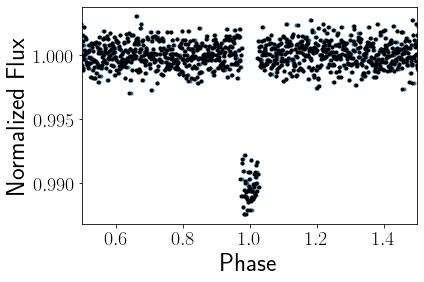

In [7]:
phase = ss.calc_phase(porbs[0], x-t0s[0])
plt.plot(true_phase, y, "C0.", zorder=0)
plt.plot(true_phase+1, y, "C0.", zorder=0)
plt.plot(phase, y, "k.")
plt.plot(phase+1, y, "k.")
plt.xlim(.5, 1.5);
plt.xlabel("Phase")
plt.ylabel("Normalized Flux");

Mask the transits and plot the resulting light curve.

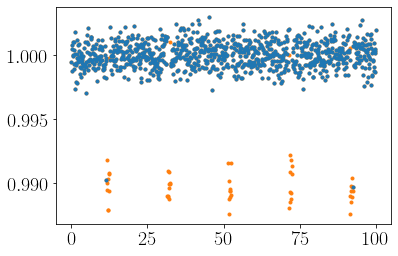

In [8]:
plt.plot(x, y, "C1.")
plt.plot(x[~transit_masks[0]], y[~transit_masks[0]], "C0.")

Or

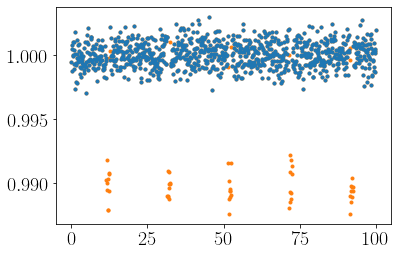

In [9]:
mask = ss.transit_mask(x, t0s[0], durs[0]+.1, porbs[0])
plt.plot(x, y, "C1.")
plt.plot(x[mask], y[mask], "C0.")